<a href="https://colab.research.google.com/github/tutsilianna/Tools_and_Methods_of_math_tech/blob/main/lab5/%D0%98%D0%B8%D0%9C%D0%9C%D0%A2_%D0%9B%D0%A0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №5**


---


**Команда №2:**

*Давыдова Кристина Сергеевна*        
*Поздышева Татьяна Сергеевна*

---



**"Метод градиентного спуска."**

*Цель лабораторной работы*: исследовать и сравнить сходимость метода градиентного спуска с постоянным шагом и при помощи метода дробления шага с применением условий Армихо.классификатора.

1. Реализуйте градиентный спуск с постоянным шагом и алгоритм
спуска с дроблением шага, используя условие Армихо.

2. Проанализируйте траектории предложенных алгоритмов на примере квадратичных функций. Для этого придумайте две-три квадратичные функции от двух переменных вида $f(x, y) = ax^2 + by^2$ с положительными коэффициентами, на которых работа методов будет отличаться.

3. Для каждой функции:

    • исследуйте сходимость градиентного спуска с постоянным шагом, сравните полученные результаты для выбранных функций;

    • сравните эффективность методов с точки зрения количества вычислений минимизируемой функции и ее градиентов;

    • исследуйте работу методов в зависимости от выбора начальной точки;
    
    • нарисуйте графики с линиями уровня и траекториями методов;

4. Реализуйте генератор случайных квадратичных функций n переменных с числом обусловленности $k$.

5. Исследуйте зависимость числа итераций $T(n, k)$, необходимых градиентному спуску для сходимости в зависимости от размерности пространства $2 ⩽ n ⩽ 10^3$ и числа обусловленности оптимизируе-
мой функции $1 ⩽ k ⩽ 10^3$.

##Подключение библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

##Реализация градиентного спуска с использованием постоянного шага

<!--
def gradient_descent_constant_stepsize(x0, learn_rate, num_iters):
  x = x0
  for _ in range(num_iters):
    grad = df(x)
    x = x - learn_rate * grad
  return x
  
`f` - функция, определяющая целевую функцию. В данном случае это функция $f(x) = x^2$

`df` - функция, определяющая производную целевой функции. В данном случае это функция $df(x) = 2x$


def f(x): return x**2

def df(x): return 2*x
  -->

Функции `f_n` и `grad_f_n` определяют функцию от $n$ переменных и её градиент соответственно.

* `f_n`  возвращает значение функции в точке `x`, где $x$ - вектор.

* `grad_f_n` возвращают список значений `коэффициент*икс^2`, чтобы найти значение функции или ее градиента, нужно просуммировать все значения соответствующего списка.

С помощью функции `print_f` можно вывести сгенерированную функцию в виде строки на экран.

Критерием останова: $\frac{|f(x_{k+1}) - f(x_k)|}{||\bigtriangledown{f(x_{k+1})} - \bigtriangledown{f(x_k)}||} < ɛ$

In [ ]:
def f_n(x, coef):
    return sum(coef * x ** 2)

def grad_f_n(x, coef):
    return x*coef

def print_f(coef):
    res = 'f(x) = '
    for i in range(len(coef)):
        res += f'{round(coef[i], 5)}*(x_{i+1})^2 '
        if i < len(coef) - 1 :
            res += ' + '
    print(res)

In [ ]:
""" Градиентный спуск без условия Армихо (адаптирован для функции n переменных)"""
""" изменен критерий останова"""
def gradient_descent_(x, learn_rate, eps, iters, params):
    trac = [x]
    iter = 0
    while True:
        f_pre = f_n(x, params)
        grad_pre = grad_f_n(x, params)

        x = x - learn_rate * grad_pre
        trac.append(x)
        iter +=1

        f_post = f_n(x, params)
        grad_post = grad_f_n(x, params)

        if  np.abs(f_post - f_pre) / np.linalg.norm(grad_post - grad_pre) < eps or iter > iters:  #  np.linalg.norm(grad_pre) < eps or iter > iters:
            if iter > iters:
                res = f'Сделано максимальное количество итераций: {iter}'
            else:
                res = f'Сделано итераций: {iter}'
            return x, trac, res

`x0` - начальная точка для градиентного спуска

`learn_rate` -  шаг для градиентного спуска

`iters` - количество итераций градиентного спуска

`x_min_g` - результат выполнения градиентного спуска с постоянным шагом

In [ ]:
x0 = np.array([0, 1.])
eps = 10e-6
learn_rate = 0.19
iters = 1000
params = np.array([1/2., 2/3.])

In [ ]:
# beta = 0.01
# x_min_g, trac, res = gradient_descent_(x0, beta, eps, iters, params)
# while abs(sum(x_min_g)) < 1:
#     beta += 0.01
#     x_min_g, trac, res = gradient_descent_(x0, beta, eps, iters, params)

# beta = beta - 0.01
# print(beta)
# x_min_g, trac, res = gradient_descent_(x0, beta, eps, iters, params)
# print(x_min_g, res)

In [ ]:
x_min_g, trac, res = gradient_descent_(x0, learn_rate, eps, iters, params)

print_f(params)
print(f"Минимум функции находится в точке: ({' ,'.join(map(str, x_min_g))}). {res}")

f(x) = 0.5*(x_1)^2  + 0.66667*(x_2)^2 
Минимум функции находится в точке: (0.0 ,4.440003685493053e-06). Сделано итераций: 91


##Реализация алгоритма спуска с дроблением шага и условием Армихо


<!-- Функция `backtrack_line_search` реализует алгоритм дробления шага с использованием условия Армихо. Она принимает на вход целевую функцию `f`, ее градиент `df`, текущую точку `x`, начальный размер шага `learn_rate` и коэффициент уменьшения шага `beta`.

Условие Армихо проверяет, что значение целевой функции в обновленной точке `(x - step * df(x))` меньше определенного порога, определяемого параметром `learn_rate` и нормой градиента.

def backtrack_line_search(f, df, x, learn_rate, beta):
    step = 1.0
    while f(x - step * df(x)) > f(x) - learn_rate * step * np.linalg.norm(df(x)) ** 2:
        step *= beta
    return step

Функция `gradient_descent_backtracking` реализует алгоритм градиентного спуска с дроблением шага, используя условие Армихо.

Переменная `x` инициализируется начальной точкой `x0`.

На каждой итерации вычисляется градиент в текущей точке `x` с использованием аналитического выражения `df(x)`.

Размер шага `step` определяется с помощью функции `backtrack_line_search`.

Текущая точка `x` обновляется с использованием размера шага `step` и градиента.

Процесс повторяется для заданного количества итераций.


def gradient_descent_backtracking(f, df, x0, alpha, beta, num_iters):
    x = x0
    for i in range(num_iters):
        grad = df(x)
        step = backtrack_line_search(f, df, x, alpha, beta)
        x -= step * grad
    return x
-->


Функция `condition_armijo` проверяет условие Армихо, а именно: $$ f(x_k) - f(x_k - β_k \bigtriangledown{f(x_k)}) \geq ɛ β_k ||\bigtriangledown{f(x_k)}||^2$$
если оно выполняется, то функция возвращает `True` и текущий `learning_rate`, если нет, то начинается подсчет кол-ва итераций в переменной `iter` и кол-во подходов для подсчёта итераций: `count_iter`.

Далее начинает вычисляться $β_{k+1}$ по формуле $β_{k+1} = λ β_k,$ где $λ$ - случайное число из промежутка $(0,1)$. Вычисляется до тех пор, пока не будет выполнено условие Армихо, при этом пересчитывая $β_{k}$. Если кол-во итераций для пересчета $β_{k}$ будет = 100, то $β_{k+1} = 1$. Рестарт происходит 3 раза. Если после этого всё ещё не найдено $β_{k}$, то градиентный спуск прекращается.



In [ ]:
import random
""" функция, проверяющая условие Армихо"""
def condition_armijo(x, learn_rate, eps, params):
    grad = grad_f_n(x, params)
    if f_n(x, params) - f_n(x - learn_rate * grad, params) >= eps * learn_rate * np.linalg.norm(grad) ** 2:
        return True, learn_rate
    else:
        iter = 1
        count_iter = 0
        learn_rate = random.uniform(0, 1) * learn_rate
        while f_n(x, params) - f_n(x - learn_rate * grad, params) < eps * learn_rate * np.linalg.norm(grad) ** 2:
            learn_rate = random.uniform(0, 1) * learn_rate
            iter += 1

            if iter == 100 and count_iter != 3:
                learn_rate = 1
                iter = 1
                count_iter += 1
            elif count_iter == 3:
                return False, learn_rate
        return True, learn_rate


Функция `gradient_descent_with_armijo_` реализует алгоритм градиентного спуска с дроблением шага, используя условие Армихо.

Переменная `x` инициализируется начальной точкой `x0`. На каждой итерации вычисляется функция и градиент в текущей точке `x` с использованием функций `f_n(x, params)` и `grad_f_n(x, params)`.

----
Размер шага `learn_rate` определяется с помощью функции `condition_armijo`. Если подобрано значение `learn_rate`, то текущая точка `x` обновляется с использованием размера шага `learn_rate` и градиента. Иначе - градиентный спуск прекращается.

Процесс повторяется не более заданного количества итераций либо пока не будет выполнено условие: $$\frac{|f(x_{k+1}) - f(x_k)|}{||\bigtriangledown{f(x_{k+1})} - \bigtriangledown{f(x_k)}||} < ɛ$$

In [ ]:
""" Градиентный спуск с условием Армихо (адаптирован для функции n переменных)"""
def gradient_descent_with_armijo_(x, learn_rate, eps, iters, params):
    trac = [x]
    iter = 0
    while True:
        # print(x)
        # print(learn_rate)
        f_pre = f_n(x, params)
        grad_pre = grad_f_n(x, params)

        step, learn_rate = condition_armijo(x, learn_rate, eps, params)

        if step:
            x = x - learn_rate * grad_pre
            trac.append(x)
            iter +=1

            # f_post = f_n(x, params)
            # grad_post = grad_f_n(x, params)

            if  np.linalg.norm(grad_pre) < eps or iter > iters: # np.abs(f_post - f_pre) / np.linalg.norm(grad_post - grad_pre) < eps or iter > iters:
                if iter > iters:
                    res = 'Сделано максимальное количество итераций'
                else:
                    res = f'Сделано итераций: {iter}'
                return x, trac, res
        else:
            res = 'Шаг был слишком маленьким, его не удалось подобрать. Количество сделанных итераций: ' + str(iter)
            return x, trac, res

In [ ]:
# x0 = np.array([0, 1.])
# eps = 10e-6
# learn_rate = 0.19
# iters = 1000
# params = np.array([1/2., 2/3.])

x_min_g2, trac2, res2 = gradient_descent_with_armijo_(x0, learn_rate, eps, iters, params)

print_f(params)
print(f"Минимум функции находится в точке: ({' ,'.join(map(str, x_min_g2))}). {res2}")

f(x) = 0.5*(x_1)^2  + 0.66667*(x_2)^2 
Минимум функции находится в точке: (0.0 ,1.145837613552354e-05). Сделано итераций: 84


## Траектории предложенных алгоритмов на примере квадратичных функций

1. $f(x, y) = 5x^2 + 10y^2$
2. $f(x, y) = 9x^2 + 2/3 y^2$

<!--
1. $f(x, y) = 5x^2 + 10y^2$
2. $f(x, y) = 1/2x^2 + 2/3 y^2$ -->



<!-- """ Второй вариант градиентного спуска (адаптирован только для функции двух переменных)"""
def gradient_descent(x0, y0, alpha, epsilon, iters, a, b):
    iter = 0
    x = x0
    y = y0
    f = lambda x, y: a*x**2 + b*y**2  # Функция f(x, y) = ax^2 + by^2
    df_dx = lambda x: 2*a*x  # df/dx
    df_dy = lambda y: 2*b*y  # df/dy

    trajectory = [(x, y)]

    while True:
        f_curr = f(x, y)

        grad_x = df_dx(x)
        grad_y = df_dy(y)

        x_new = x - alpha * grad_x
        y_new = y - alpha * grad_y

        grad_curr = np.array([grad_x, grad_y])
        grad_new = np.array([df_dx(x_new), df_dy(y_new)])

        f_new = f(x_new, y_new)
        if np.abs(f_curr - f_new) / np.linalg.norm(grad_new - grad_curr) < epsilon or iter > iters:
            if iter > iters:
                print('Сделано максимальное количество итераций')
            else:
                print('Сделано итераций: ', iter)
            break

        x = x_new
        y = y_new
        iter += 1

        trajectory.append((x, y))

    return x, y, trajectory -->

In [ ]:
# Пример использования:
x0 = np.array([1.5, 1.])
eps = 10e-6
learn_rate = 0.1
iters = 1000
# params = np.array([1/2., 2/3.])

params1 = np.array([5., 10.])
params2 = np.array([9., 2/3])

In [ ]:
print("Первый вариант градиентного спуска для функции:", end=' ')
print_f(params1)
print()

x_min_, trac_, res_ = gradient_descent_(x0, learn_rate, eps, iters, params1)

print(f"Минимум функции достигается в точке: ({' ,'.join(map(str, x_min_))})")
print("Значение функции в точке минимум:", f_n(x_min_, params1))
print(res_)

print()
print("----------------------------------------------------")
print()

print("Первый вариант градиентного спуска для функции:", end=' ')
print_f(params2)
print()

x_min1_, trac1_, res1_ = gradient_descent_(x0, learn_rate, eps, iters, params2)

print(f"Минимум функции достигается в точке: ({' ,'.join(map(str, x_min1_))})")
print("Значение функции в точке минимум:", f_n(x_min1_, params2))
print(res1_)

Первый вариант градиентного спуска для функции: f(x) = 5.0*(x_1)^2  + 10.0*(x_2)^2 

Минимум функции достигается в точке: (2.86102294921875e-06 ,0.0)
Значение функции в точке минимум: 4.092726157978177e-11
Сделано итераций: 19

----------------------------------------------------

Первый вариант градиентного спуска для функции: f(x) = 9.0*(x_1)^2  + 0.66667*(x_2)^2 

Минимум функции достигается в точке: (1.4999999999998613e-178 ,4.64030192092866e-06)
Значение функции в точке минимум: 1.435493461158281e-11
Сделано итераций: 178


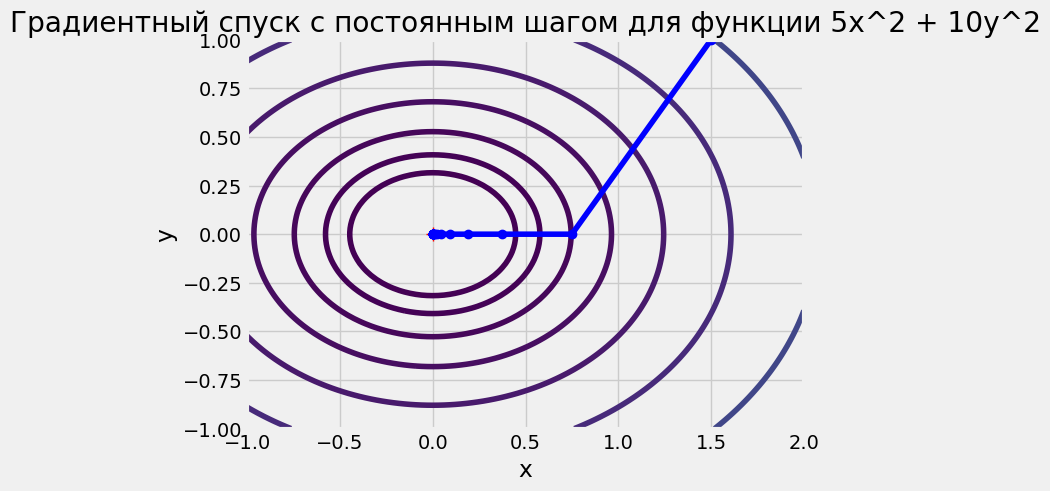

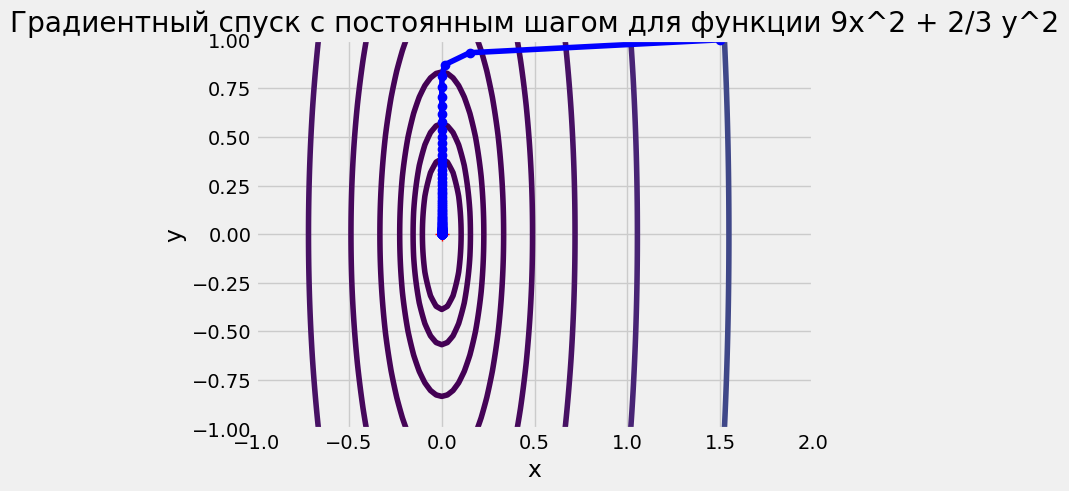

In [ ]:
x_min, y_min = x_min_[0], x_min_[1]

# Создание сетки точек для построения линий уровня
x = np.linspace(-1, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z =  params1[0]*X**2 + params1[1]*Y**2 # f_n(np.array([X, Y]), params1) #

# Построение линий уровня
plt.contour(X, Y, Z, levels=np.logspace(0, 2, 10))
plt.plot(x_min, y_min, 'r+', markersize=10)
x_trajectory, y_trajectory = zip(*trac_)
plt.plot(x_trajectory, y_trajectory, '-bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Градиентный спуск с постоянным шагом для функции 5x^2 + 10y^2')
plt.show()

# Создание сетки точек для построения линий уровня

Z1 = params2[0]*X**2 + params2[1]*Y**2 # f_n([X, Y], params2)

x_min1, y_min1 = x_min1_[0], x_min1_[1]

# Построение линий уровня
plt.contour(X, Y, Z1, levels=np.logspace(-1, 2, 10))
plt.plot(x_min1, y_min1, 'r+', markersize=10)
x_trajectory1, y_trajectory1 = zip(*trac1_)
plt.plot(x_trajectory1, y_trajectory1, '-bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Градиентный спуск с постоянным шагом для функции 9x^2 + 2/3 y^2')
plt.show()

In [ ]:
# Пример использования:
# x0 = np.array([0, 1.])
# eps = 10e-6
learn_rate = 0.15
# iters = 1000
# # params = np.array([1/2., 2/3.])

# params1 = np.array([5., 10.])
# params2 = np.array([9., 2/3])

In [ ]:
x_min_, trac_, res_ = gradient_descent_with_armijo_(x0, learn_rate, eps, iters, params1)

print("Вариант градиентного спуска с условием Армихо для функции:", end=' ')
print_f(params1)
print()

print(f"Минимум функции достигается в точке: ({' ,'.join(map(str, x_min_))})")
print("Значение функции в точке минимум:", f_n(x_min_, params1))
print(res_)

print()
print("----------------------------------------------------")
print()

x_min1_, trac1_, res1_ = gradient_descent_with_armijo_(x0, learn_rate, eps, iters, params2)

print("Вариант градиентного спуска с условием Армихо для функции:", end=' ')
print_f(params2)
print()

print(f"Минимум функции достигается в точке: ({' ,'.join(map(str, x_min1_))})")
print("Значение функции в точке минимум:", f_n(x_min1_, params2))
print(res1_)

Вариант градиентного спуска с условием Армихо для функции: f(x) = 5.0*(x_1)^2  + 10.0*(x_2)^2 

Минимум функции достигается в точке: (3.410605131648481e-13 ,-4.76837158203125e-07)
Значение функции в точке минимум: 2.2737367544329022e-12
Сделано итераций: 21

----------------------------------------------------

Вариант градиентного спуска с условием Армихо для функции: f(x) = 9.0*(x_1)^2  + 0.66667*(x_2)^2 

Минимум функции достигается в точке: (-2.46247598924921e-49 ,1.2704234747596554e-05)
Значение функции в точке минимум: 1.0759838701469311e-10
Сделано итераций: 107


**Из выводов видно, что градиентный спуск с условием Армихо, сходится быстрее.**

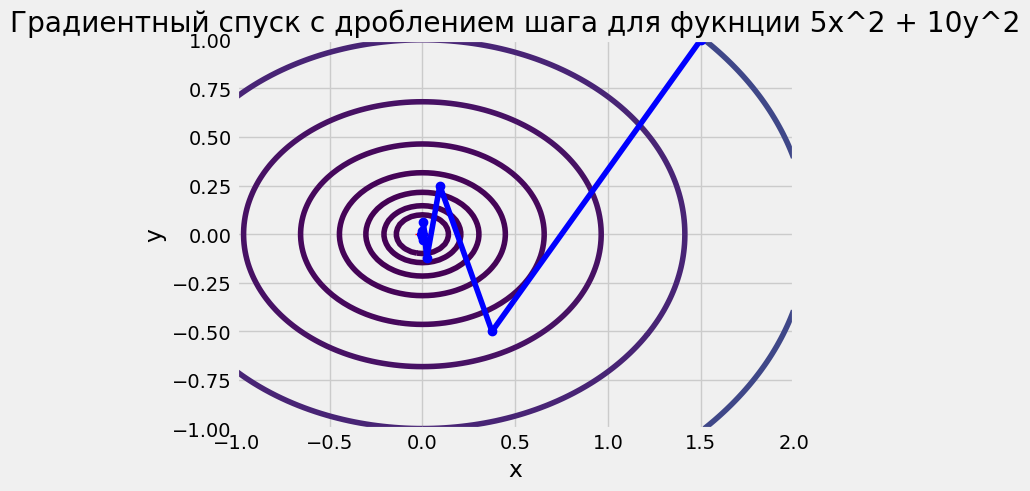

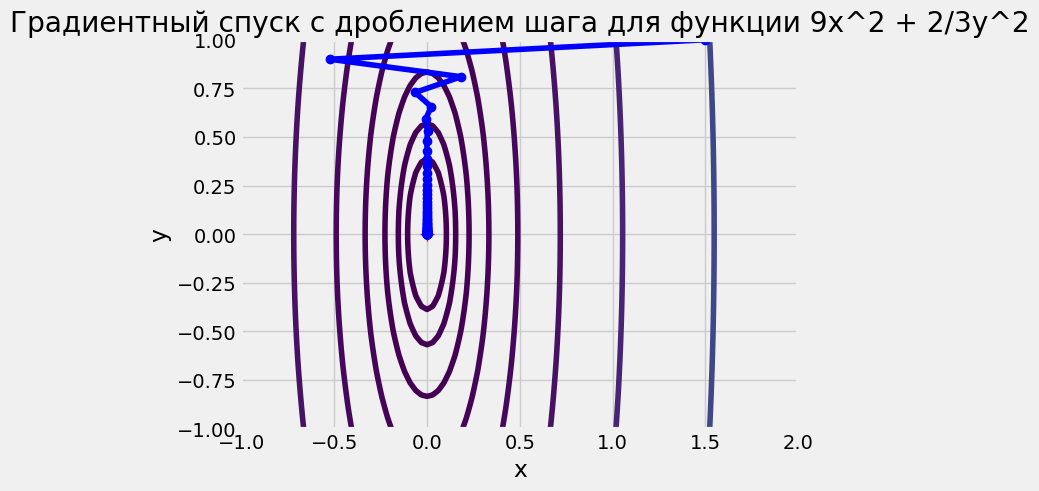

In [ ]:
# Создание сетки точек для построения линий уровня
# x = np.linspace(-1, 1, 100)
# y = np.linspace(-1, 1, 100)
# X, Y = np.meshgrid(x, y)
# Z = f_n([X, Y], params1) # a[0]*X**2 + b[0]*Y**2

x_min, y_min = x_min_[0], x_min_[1]

# Построение линий уровня
plt.contour(X, Y, Z, levels=np.logspace(-1, 2, 10))
plt.plot(x_min, y_min, 'r+', markersize=10)
x_trajectory, y_trajectory = zip(*trac_)
plt.plot(x_trajectory, y_trajectory, '-bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Градиентный спуск с дроблением шага для фукнции 5x^2 + 10y^2')
plt.show()

# Создание сетки точек для построения линий уровня

#Z1 = a[1]*X**2 + b[1]*Y**2
x_min1, y_min1 = x_min_[0], x_min_[1]

# Построение линий уровня
plt.contour(X, Y, Z1, levels=np.logspace(-1, 2, 10))
plt.plot(x_min1, y_min1, 'r+', markersize=10)
x_trajectory1, y_trajectory1 = zip(*trac1_)
plt.plot(x_trajectory1, y_trajectory1, '-bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Градиентный спуск с дроблением шага для функции 9x^2 + 2/3y^2')
plt.show()

### Проверим работу методов в зависимости от выбора начальной точки

In [ ]:
# Пример использования:
# x0 = np.array([0, 1.])
# eps = 10e-6
# learn_rate = 0.19
# iters = 1000
# # params = np.array([1/2., 2/3.])

# params1 = np.array([5., 10.])
# params2 = np.array([9., 2/3])

X0 = [np.array([1, 1]),
      np.array([0, 1]),
      np.array([1, 0]),
      np.array([2, 6]),
      np.array([10, 10])
      ]

print('Первая функция: ', end=' ')
print_f(params1)

print(f'learning rate = {learn_rate}\n\n')

print('Слева без условия Армихо, справа с условием Армихо\n')
for x0 in X0:

    print(f'           x0 = ({" ,".join(map(str, x0))})')

    x_min_1, trac_1, res_1 = gradient_descent_(x0, learn_rate, eps, iters, params1)

    x_min_2, trac_2, res_2 = gradient_descent_with_armijo_(x0, learn_rate, eps, iters, params1)

    print(f"Точка минимума:                   ({' ,'.join(map(str, x_min_1))}) | ({' ,'.join(map(str, x_min_2))})")
    print(f"Значение функции в точке минимум: {f_n(x_min_1, params1)} | {f_n(x_min_2, params1)}")
    print(f"Итерации:                         {res_1} | {res_2}")
    print()
    print("----------------------------------------------------")
    print()

Первая функция:  f(x) = 5.0*(x_1)^2  + 10.0*(x_2)^2 
learning rate = 0.15


Слева без условия Армихо, справа с условием Армихо

           x0 = (1 ,1)
Точка минимума:                   (5.820766091346741e-11 ,-7.62939453125e-06) | (2.2737367544323206e-13 ,-4.76837158203125e-07)
Значение функции в точке минимум: 5.820766091516147e-10 | 2.273736754432579e-12
Итерации:                         Сделано итераций: 17 | Сделано итераций: 21

----------------------------------------------------

           x0 = (0 ,1)
Точка минимума:                   (0.0 ,-7.62939453125e-06) | (0.0 ,-4.76837158203125e-07)
Значение функции в точке минимум: 5.820766091346741e-10 | 2.2737367544323206e-12
Итерации:                         Сделано итераций: 17 | Сделано итераций: 21

----------------------------------------------------

           x0 = (1 ,0)
Точка минимума:                   (9.5367431640625e-07 ,0.0) | (2.384185791015625e-07 ,0.0)
Значение функции в точке минимум: 4.547473508864641e-12 | 2.84217

In [ ]:
print('Вторая функция: ', end=' ')
print_f(params2)

print('Слева без условия Армихо, справа с условием Армихо\n')
for x0 in X0:


    print(f'           x0 = ({" ,".join(map(str, x0))})')

    x_min_1, trac_1, res_1 = gradient_descent_(x0, learn_rate, eps, iters, params2)

    x_min_2, trac_2, res_2 = gradient_descent_with_armijo_(x0, learn_rate, eps, iters, params2)

    print(f"Точка минимума:                   ({' ,'.join(map(str, x_min_1))}) | ({' ,'.join(map(str, x_min_2))})")
    print(f"Значение функции в точке минимум: {f_n(x_min_1, params2)} | {f_n(x_min_2, params2)}")
    print(f"Итерации:                         {res_1} | {res_2}")
    print()
    print("----------------------------------------------------")
    print()

Вторая функция:  f(x) = 9.0*(x_1)^2  + 0.66667*(x_2)^2 
Слева без условия Армихо, справа с условием Армихо

           x0 = (1 ,1)
Точка минимума:                   (-4.5285710821594456e-54 ,4.429692754456183e-06) | (-1.641650659499473e-49 ,1.2704234747596554e-05)
Значение функции в точке минимум: 1.3081451932587736e-11 | 1.0759838701469311e-10
Итерации:                         Сделано итераций: 117 | Сделано итераций: 107

----------------------------------------------------

           x0 = (0 ,1)
Точка минимума:                   (0.0 ,4.429692754456183e-06) | (0.0 ,1.2704234747596554e-05)
Значение функции в точке минимум: 1.3081451932587736e-11 | 1.0759838701469311e-10
Итерации:                         Сделано итераций: 117 | Сделано итераций: 107

----------------------------------------------------

           x0 = (1 ,0)
Точка минимума:                   (3.3792205080566327e-06 ,0.0) | (-1.44884079282928e-07 ,0.0)
Значение функции в точке минимум: 1.0277218117863473e-10 | 1.8892

## Генератор случайных квадратичных функций

<!--Функция `generate_quadratic_function` принимает два аргумента: `n` - размерность функции (количество переменных) и `k` - число обусловленности.
Функция возвращает функциональный объект `quadratic_function`, который можно использовать для вычислять значения квадратичной функции от двух переменных `x` и `y`.

Затем, в пользовательском коде, можно создать объект квадратичной функции, использующий параметры `n=2` и `k=10` с помощью вызова `generate_quadratic_function(2, 10)`. Затем можно использовать этот объект функции для вычисления значения функции на определенных значениях переменных, например, `result = function(3, 4)`.
Значение `result` будет результатом вычисления квадратичной функции `f(3, 4)`.

```
"""def generate_quadratic_function(n, k):
    coefficients = np.linspace(1, k, n)
    def quadratic_function(x, y):
        result = 0
        for i in range(n):
            result += coefficients[i] * x**2 + coefficients[i] * y**2
        return result

    print(f"Случайная квадратичная функция от двух переменных f(x, y) = {[f'{coefficients[i]}x^2 + {coefficients[i]}y^2' for i in range(n)]}")
    return quadratic_function

#Пример использования:

function = generate_quadratic_function(3, 10)
result = function(3, 4)
print(result)
"""
```
-->


Функция `generate_function` принимает два аргумента: `n` - размерность функции (количество переменных) и `k` - число обусловленности. Возращает коэффициенты для функции n переменных.

In [ ]:
def generate_function(n, k):
    coefficients = np.linspace(1, k, n)
    return coefficients

#Пример использования:

coef = generate_function(3, 2)
print('Коэффициенты: ', *coef, end='\n\n')
print('Значение функции : ', f_n(np.array([1., 1., 1.]), coef), end='\n\n')
print('Градиент функции (коэффициент*икс^2): ', *grad_f_n(np.array([1., 1., 1.]), coef), end='\n\n')
print_f(coef)

Коэффициенты:  1.0 1.5 2.0

Значение функции :  4.5

Градиент функции (коэффициент*икс^2):  1.0 1.5 2.0

f(x) = 1.0*(x_1)^2  + 1.5*(x_2)^2  + 2.0*(x_3)^2 


## Исследование зависимости числа итераций T(n, k), необходимых градиентному спуску для сходимости в зависимости от размерности пространства $2 ⩽ n ⩽ 10^3$ и числа обусловленности оптимизируемой функции $1 ⩽ k ⩽ 10^3$

In [ ]:
alpha = 0.3
epsilon = 1e-6
iters = 10_000

In [ ]:
K = [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 50, 100, 500, 1000]
N = [2, 3, 4, 5, 10, 20, 50, 100, 500, 1000]

print('n | k | без условий Армихо | с условиями Армихо')
for k in K:
    for n in N:
        x0 = np.array([1 for i in range(n)], dtype=np.float64)
        coef = np.array(generate_function(n, k), dtype=np.float64)
        #print_f(coef)
        """ без условий Армихо """
        _, _, res1 = gradient_descent_(x0, alpha, epsilon, iters, coef)
        """ с условиями Армихо """
        _, _, res2 = gradient_descent_with_armijo_(x0, alpha, epsilon, iters, coef)
        print(f'n={n} k={k} {res1} {res2}')


n | k | без условий Армихо | с условиями Армихо
n=2 k=1 Сделано итераций: 43 Сделано итераций: 41
n=3 k=1 Сделано итераций: 43 Сделано итераций: 42
n=4 k=1 Сделано итераций: 44 Сделано итераций: 42
n=5 k=1 Сделано итераций: 44 Сделано итераций: 42
n=10 k=1 Сделано итераций: 45 Сделано итераций: 43
n=20 k=1 Сделано итераций: 46 Сделано итераций: 44
n=50 k=1 Сделано итераций: 47 Сделано итераций: 46
n=100 k=1 Сделано итераций: 48 Сделано итераций: 47
n=500 k=1 Сделано итераций: 50 Сделано итераций: 49
n=1000 k=1 Сделано итераций: 51 Сделано итераций: 50
n=2 k=2 Сделано итераций: 42 Сделано итераций: 40
n=3 k=2 Сделано итераций: 42 Сделано итераций: 40
n=4 k=2 Сделано итераций: 42 Сделано итераций: 40
n=5 k=2 Сделано итераций: 42 Сделано итераций: 40
n=10 k=2 Сделано итераций: 42 Сделано итераций: 40
n=20 k=2 Сделано итераций: 42 Сделано итераций: 41
n=50 k=2 Сделано итераций: 43 Сделано итераций: 41
n=100 k=2 Сделано итераций: 43 Сделано итераций: 42
n=500 k=2 Сделано итераций: 45 Сделан